## About
This program calculates the RSI (Relative Strength Index) of a stock using historical stock price values.

## Import modules

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

## Download the historical data

#### Set start date and end date

In [2]:
start_date = datetime.now() - relativedelta(months=12)
start_date = start_date.strftime('%Y-%m-%d')
end_date = str(datetime.now().strftime('%Y-%m-%d'))

#### Fetch data from Yahoo Finance

In [3]:
ticker = 'ETH-USD'
df = pd.DataFrame()
df[ticker] = yf.download(ticker, start=start_date, end=end_date)['Close']

[*********************100%***********************]  1 of 1 completed


#### Plot the source data

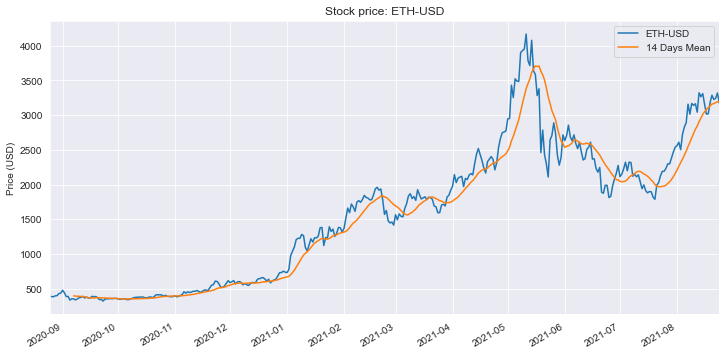

In [4]:
df['14 Days Mean'] = df.rolling(window=14).mean()
title='Stock price: ' + ticker
ylabel='Price (USD)'
xlabel=''
ax = df.plot(figsize=(12, 6), title=title)
ax.autoscale(tight=True, axis='x')
ax.set(xlabel='', ylabel=ylabel)
df.drop('14 Days Mean', inplace=True, axis=1)

## Calculate Relative Strength Index (RSI)

In [5]:
window = 14
delta = df[ticker].diff(1).dropna()
up = delta.copy()
down = delta.copy()
up[up < 0] = 0
down[down > 0] = 0
avg_gain = up.rolling(window=window).mean()
avg_loss = abs(down.rolling(window=window).mean())
rs = avg_gain/avg_loss
rsi = 100.0 - (100.0/(1.0+rs))

#### Plot the RSI with overbought and oversold levels
<a href='https://www.investopedia.com/articles/active-trading/042114/overbought-or-oversold-use-relative-strength-index-find-out.asp'>Investopedia</a>:<br>
RSI dictates that values of 70 or above suggest that a security is becoming overbought or overvalued and may be primed for a trend reversal or corrective price pullback. An RSI reading of 30 or below indicates an oversold or undervalued condition.

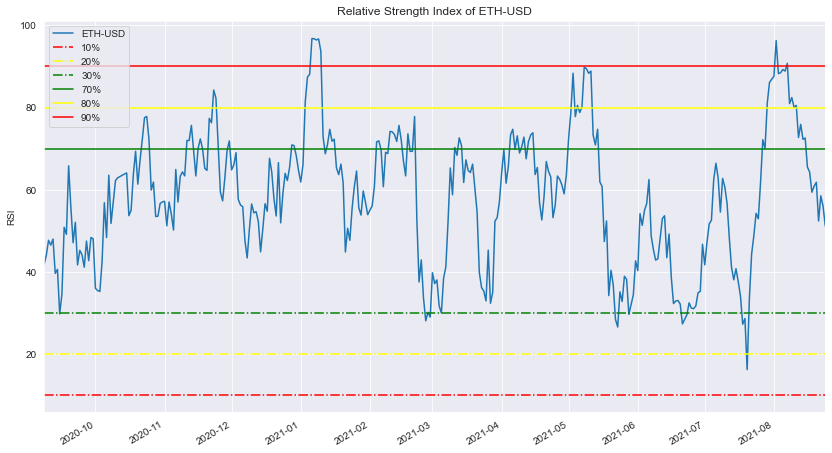

In [6]:
title = 'Relative Strength Index of ' + ticker
xlabel = ''
ylabel ='RSI'
ax = rsi.plot(figsize=(14, 8), label=ticker, title=title)
ax.autoscale(tight=True, axis='x')
ax.axhline(10, color='red', ls='-.', label='10%')
ax.axhline(20, color='yellow', ls='-.', label='20%')
ax.axhline(30, color='green', ls='-.', label='30%')
ax.axhline(70, color='green', label='70%')
ax.axhline(80, color='yellow', label='80%')
ax.axhline(90, color='red', label='90%')
ax.set(xlabel=xlabel, ylabel=ylabel);
ax.legend();